## Book 3_Twitter & Reddit_ EDA

*Note: I was unable to upload all of the datasets that I have used in these notebooks onto github because of how big the size of the file was. But if you have any questions feel free to reach out to me thank you :)*

This book will focus on the EDA (Exploratory Data Analysis) portion of the research as well as some vectorisation techniques that were used such as Count Vectorisation, N-gram and TF-IDF. I tried to utilise Word2Vec however, I was unable to find a keyword that will be able to successfully encompass bothe the suicide and non-suicide portions fo the dataset. This could be because the data is so varied and different.

    1. Twitter EDA
    2. Reddit EDA
    3. Suicide_merged (Twitter & Reddit)
    4. Vectorization of Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import regex as re
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
from collections import Counter
import pprint

import unicodedata
from sklearn.decomposition import NMF, LatentDirichletAllocation
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.probability import FreqDist
from textblob import TextBlob
from tqdm import tqdm


## Twitter's Data
    1.1: Minor data manipulation 
        1.1.1: Remove punctuation 
        1.1.2: Tokenise
        1.1.3: Remove stopwords
        1.1.4: Stemming
        1.1.5: Lemmatization

    1.2: Twitter EDA
        1.2.1: Sentiment Analysis
        1.2.2: Word Count
        1.2.3: Word Cloud
        1.2.4: Datetime

In [2]:
# Importing Twitter's Data
T_suicide = pd.read_csv('../data/T_suicide.csv')

In [3]:
T_suicide.shape

(2000, 4)

In [4]:
T_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  2000 non-null   object
 1   text      1999 non-null   object
 2   username  2000 non-null   object
 3   class     2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


In [5]:
T_suicide['class'].value_counts()

non-suicide    1000
suicide        1000
Name: class, dtype: int64

In [6]:
T_suicide.head()

,datetime,text,username,class
0,2020-01-17 23:59:10+00:00,job and i wouldn’t have to save money toward a...,KaiiiKay,suicide
1,2020-01-17 23:32:32+00:00,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,MGlmcm,suicide
2,2020-01-17 23:30:16+00:00,Back on here the cry for help but I don’t want...,Coughin_Up_Love,suicide
3,2020-01-17 22:57:16+00:00,"Ya ever had that feeling of ""I don't want to k...",real_red_rabbit,suicide
4,2020-01-17 22:11:03+00:00,I really want to kill myself just to stop thin...,TALA6955,suicide


### 1.1: Minor data manipulation

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
T_suicide['text'] = T_suicide['text'].astype(str)

In [9]:
def remove_punct(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct

T_suicide['text_clean'] = T_suicide['text'].apply(lambda x: remove_punct(x)) 

In [10]:
# Tokenization
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

T_suicide['text_tokenised'] = T_suicide['text_clean'].apply(lambda x: tokenize(x.lower()))

In [11]:
def remove_stopwords(tokenised_list):
    text = [word for word in tokenised_list if word not in stopwords]
    return text

T_suicide['text_nostop'] = T_suicide['text_tokenised'].apply(lambda x: remove_stopwords(x))

In [12]:
# Stemming words
def stemming (tokenised_text):
    text = [ps.stem(word) for word in tokenised_text]
    return text

T_suicide['text_stemmed'] = T_suicide['text_nostop']

In [13]:
wn = nltk.WordNetLemmatizer()

In [14]:
def lemmatizing(tokenised_text):
    text = [wn.lemmatize(word) for word in tokenised_text]
    return text

T_suicide['text_lemmatized'] = T_suicide['text_nostop'].apply (lambda x: lemmatizing(x))

T_suicide.head()

,datetime,text,username,class,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized
0,2020-01-17 23:59:10+00:00,job and i wouldn’t have to save money toward a...,KaiiiKay,suicide,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki..."
1,2020-01-17 23:32:32+00:00,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,MGlmcm,suicide,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]"
2,2020-01-17 23:30:16+00:00,Back on here the cry for help but I don’t want...,Coughin_Up_Love,suicide,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f..."
3,2020-01-17 22:57:16+00:00,"Ya ever had that feeling of ""I don't want to k...",real_red_rabbit,suicide,Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd..."
4,2020-01-17 22:11:03+00:00,I really want to kill myself just to stop thin...,TALA6955,suicide,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]"


In [15]:
# Rearranging 
T_suicide = T_suicide[['datetime', 'text', 'text_clean',
                       'text_tokenised', 'text_nostop', 'text_stemmed',
                       'text_lemmatized', 'username', 'class']]
T_suicide.head()

,datetime,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,username,class
0,2020-01-17 23:59:10+00:00,job and i wouldn’t have to save money toward a...,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...",KaiiiKay,suicide
1,2020-01-17 23:32:32+00:00,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]",MGlmcm,suicide
2,2020-01-17 23:30:16+00:00,Back on here the cry for help but I don’t want...,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...",Coughin_Up_Love,suicide
3,2020-01-17 22:57:16+00:00,"Ya ever had that feeling of ""I don't want to k...",Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...",real_red_rabbit,suicide
4,2020-01-17 22:11:03+00:00,I really want to kill myself just to stop thin...,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]",TALA6955,suicide


### 1.2: Twitter EDA

#### 1.2.1: Sentiment Analysis

In [16]:
T_suicide['lemma_str'] = [' '.join(map(str,l)) for l in T_suicide['text_lemmatized']]
T_suicide.head()

,datetime,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,username,class,lemma_str
0,2020-01-17 23:59:10+00:00,job and i wouldn’t have to save money toward a...,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...",KaiiiKay,suicide,job save money toward new car could kill live ...
1,2020-01-17 23:32:32+00:00,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]",MGlmcm,suicide,hate much want kill one care anyway
2,2020-01-17 23:30:16+00:00,Back on here the cry for help but I don’t want...,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...",Coughin_Up_Love,suicide,back cry help want people close know feel like...
3,2020-01-17 22:57:16+00:00,"Ya ever had that feeling of ""I don't want to k...",Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...",real_red_rabbit,suicide,ya ever feeling dont want kill im goddamn tire...
4,2020-01-17 22:11:03+00:00,I really want to kill myself just to stop thin...,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]",TALA6955,suicide,really want kill stop thinking


In [17]:
T_suicide['sentiment'] = T_suicide['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
T_suicide.head()

,datetime,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,username,class,lemma_str,sentiment
0,2020-01-17 23:59:10+00:00,job and i wouldn’t have to save money toward a...,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...",KaiiiKay,suicide,job save money toward new car could kill live ...,-0.145455
1,2020-01-17 23:32:32+00:00,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]",MGlmcm,suicide,hate much want kill one care anyway,-0.300000
2,2020-01-17 23:30:16+00:00,Back on here the cry for help but I don’t want...,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...",Coughin_Up_Love,suicide,back cry help want people close know feel like...,0.000000
3,2020-01-17 22:57:16+00:00,"Ya ever had that feeling of ""I don't want to k...",Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...",real_red_rabbit,suicide,ya ever feeling dont want kill im goddamn tire...,-0.131818
4,2020-01-17 22:11:03+00:00,I really want to kill myself just to stop thin...,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]",TALA6955,suicide,really want kill stop thinking,0.200000


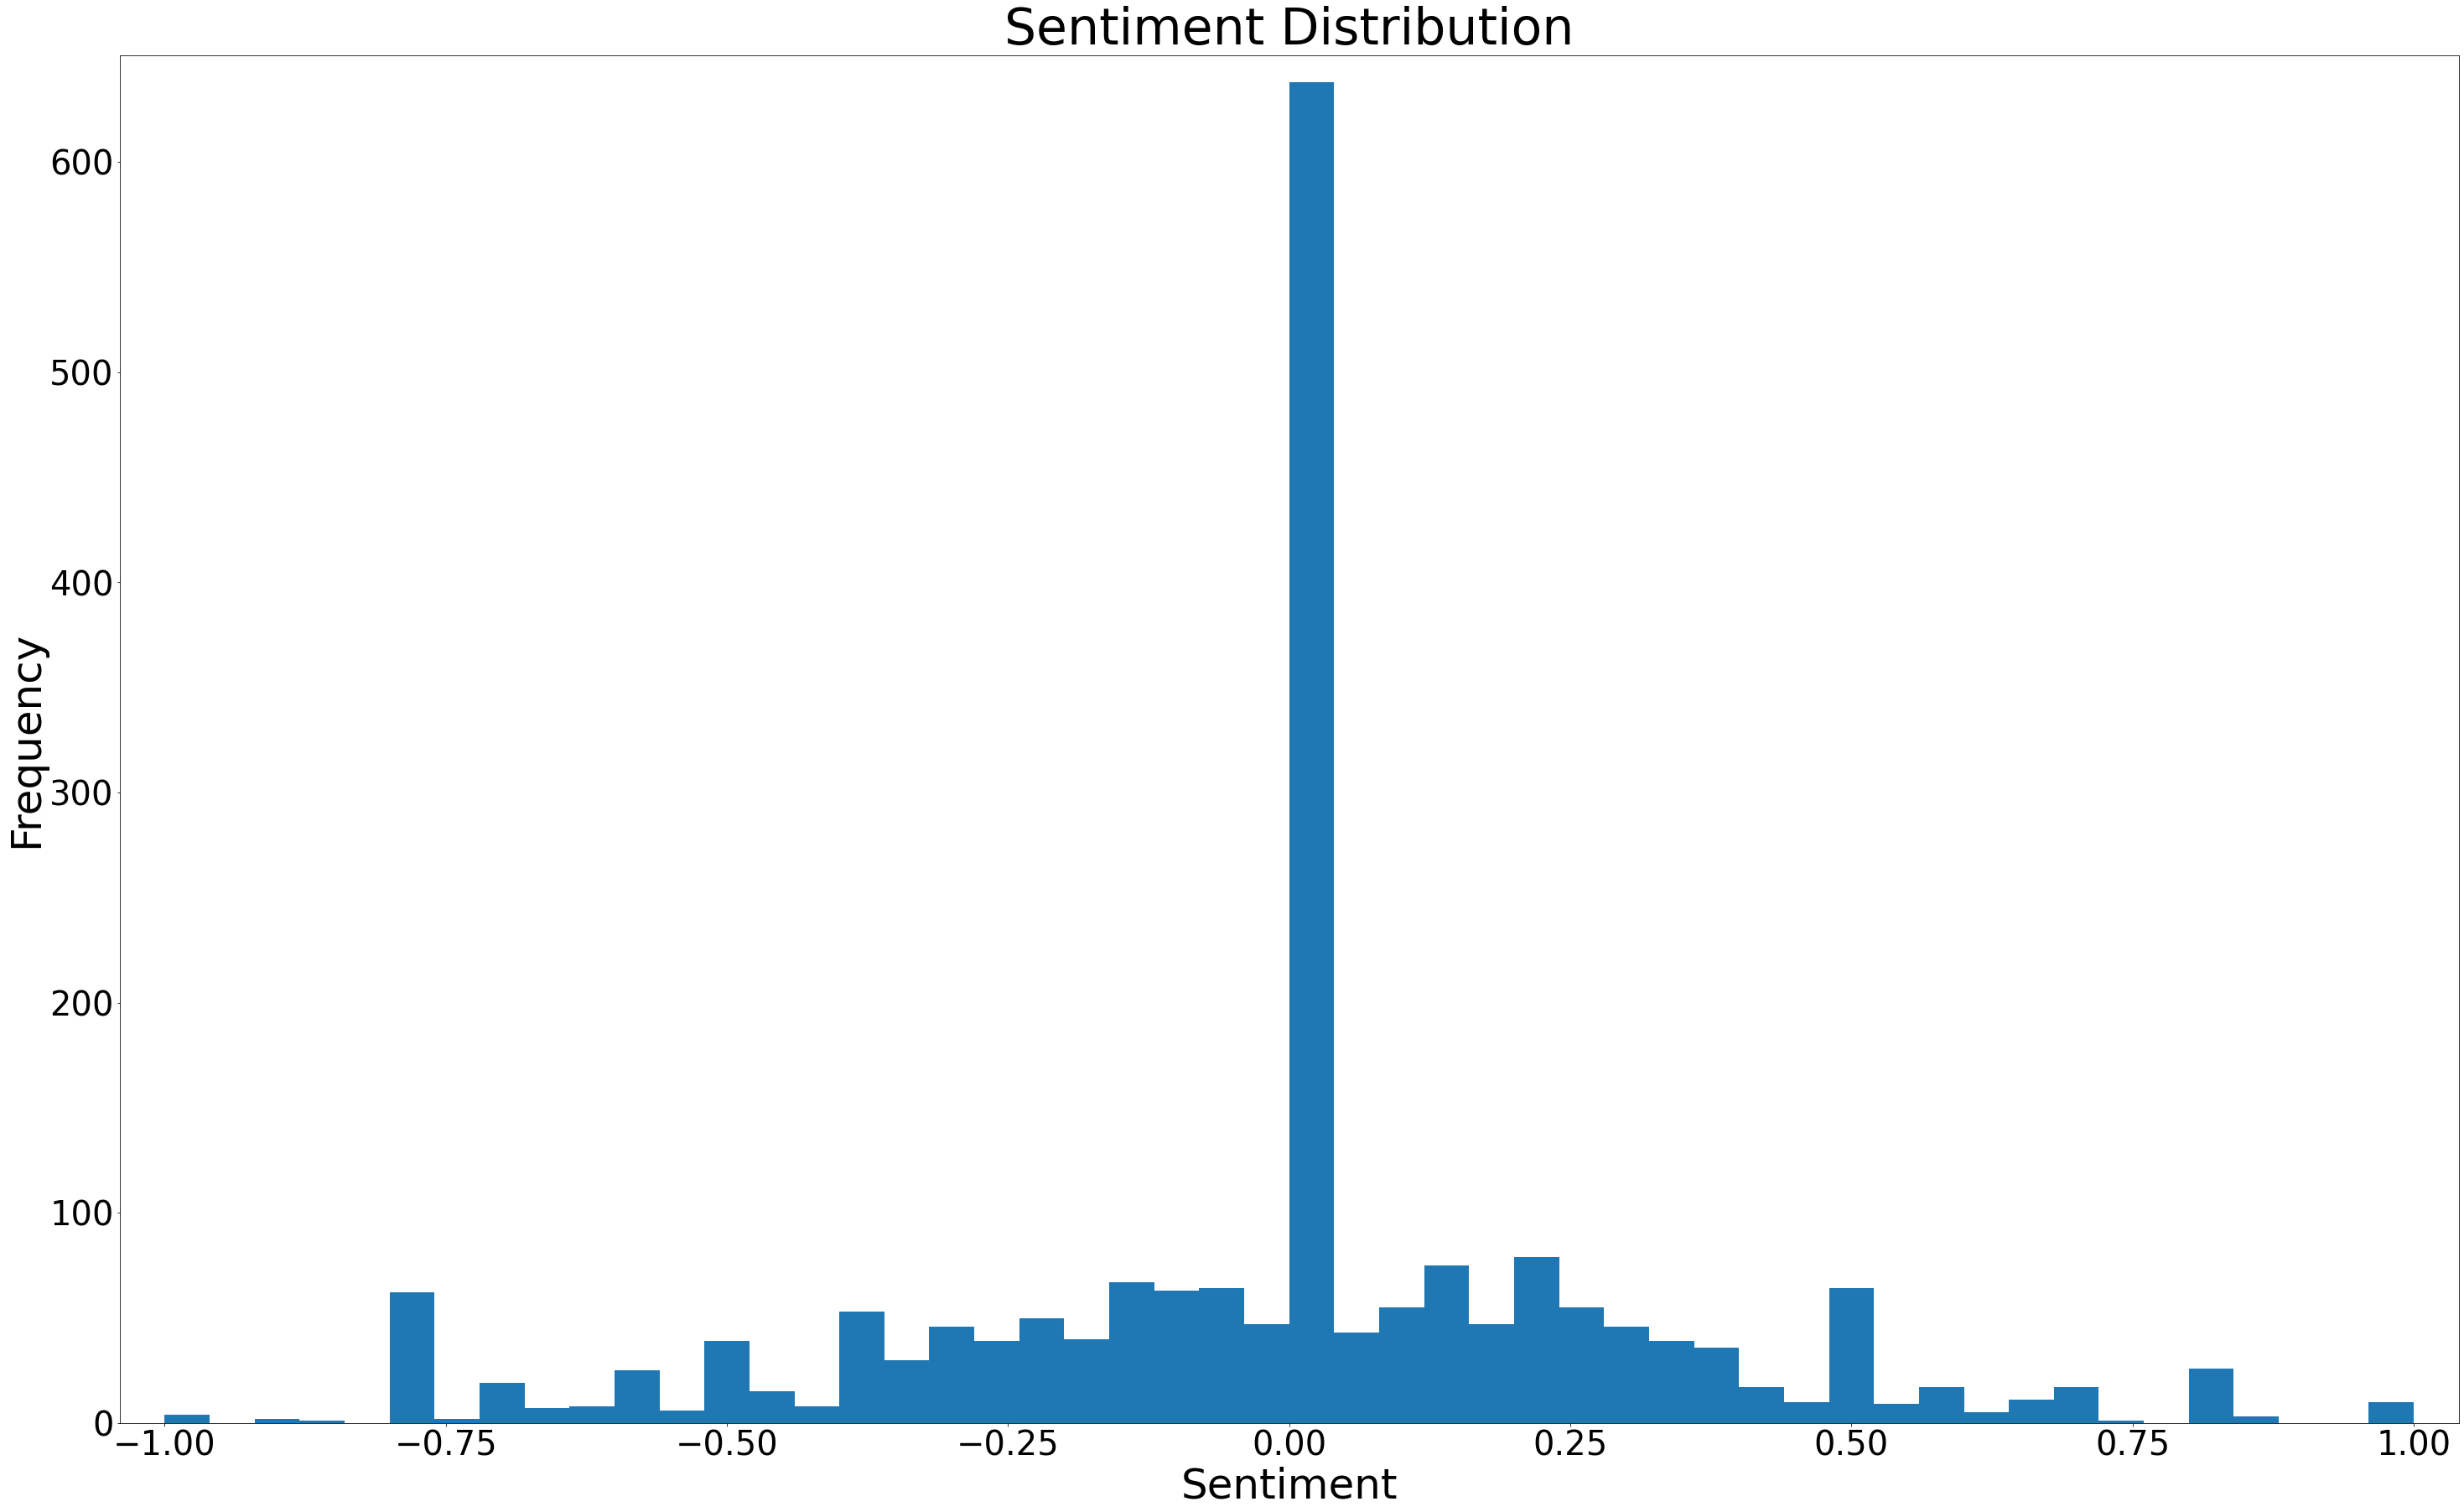

In [18]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(T_suicide['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)

# save image
plt.savefig("../graph/sentiment_twitter.jpg", bbox_inches = 'tight')
plt.show()

#### 1.2.2: Word Count

In [19]:
T_suicide['word_count'] = T_suicide['text_lemmatized'].apply(lambda x: len(str(x).split()))
T_suicide['review_len'] = T_suicide['lemma_str'].astype(str).apply(len)
T_suicide.head()

,datetime,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,username,class,lemma_str,sentiment,word_count,review_len
0,2020-01-17 23:59:10+00:00,job and i wouldn’t have to save money toward a...,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...",KaiiiKay,suicide,job save money toward new car could kill live ...,-0.145455,25,142
1,2020-01-17 23:32:32+00:00,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]",MGlmcm,suicide,hate much want kill one care anyway,-0.300000,7,35
2,2020-01-17 23:30:16+00:00,Back on here the cry for help but I don’t want...,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...",Coughin_Up_Love,suicide,back cry help want people close know feel like...,0.000000,24,138
3,2020-01-17 22:57:16+00:00,"Ya ever had that feeling of ""I don't want to k...",Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...",real_red_rabbit,suicide,ya ever feeling dont want kill im goddamn tire...,-0.131818,13,70
4,2020-01-17 22:11:03+00:00,I really want to kill myself just to stop thin...,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]",TALA6955,suicide,really want kill stop thinking,0.200000,5,30


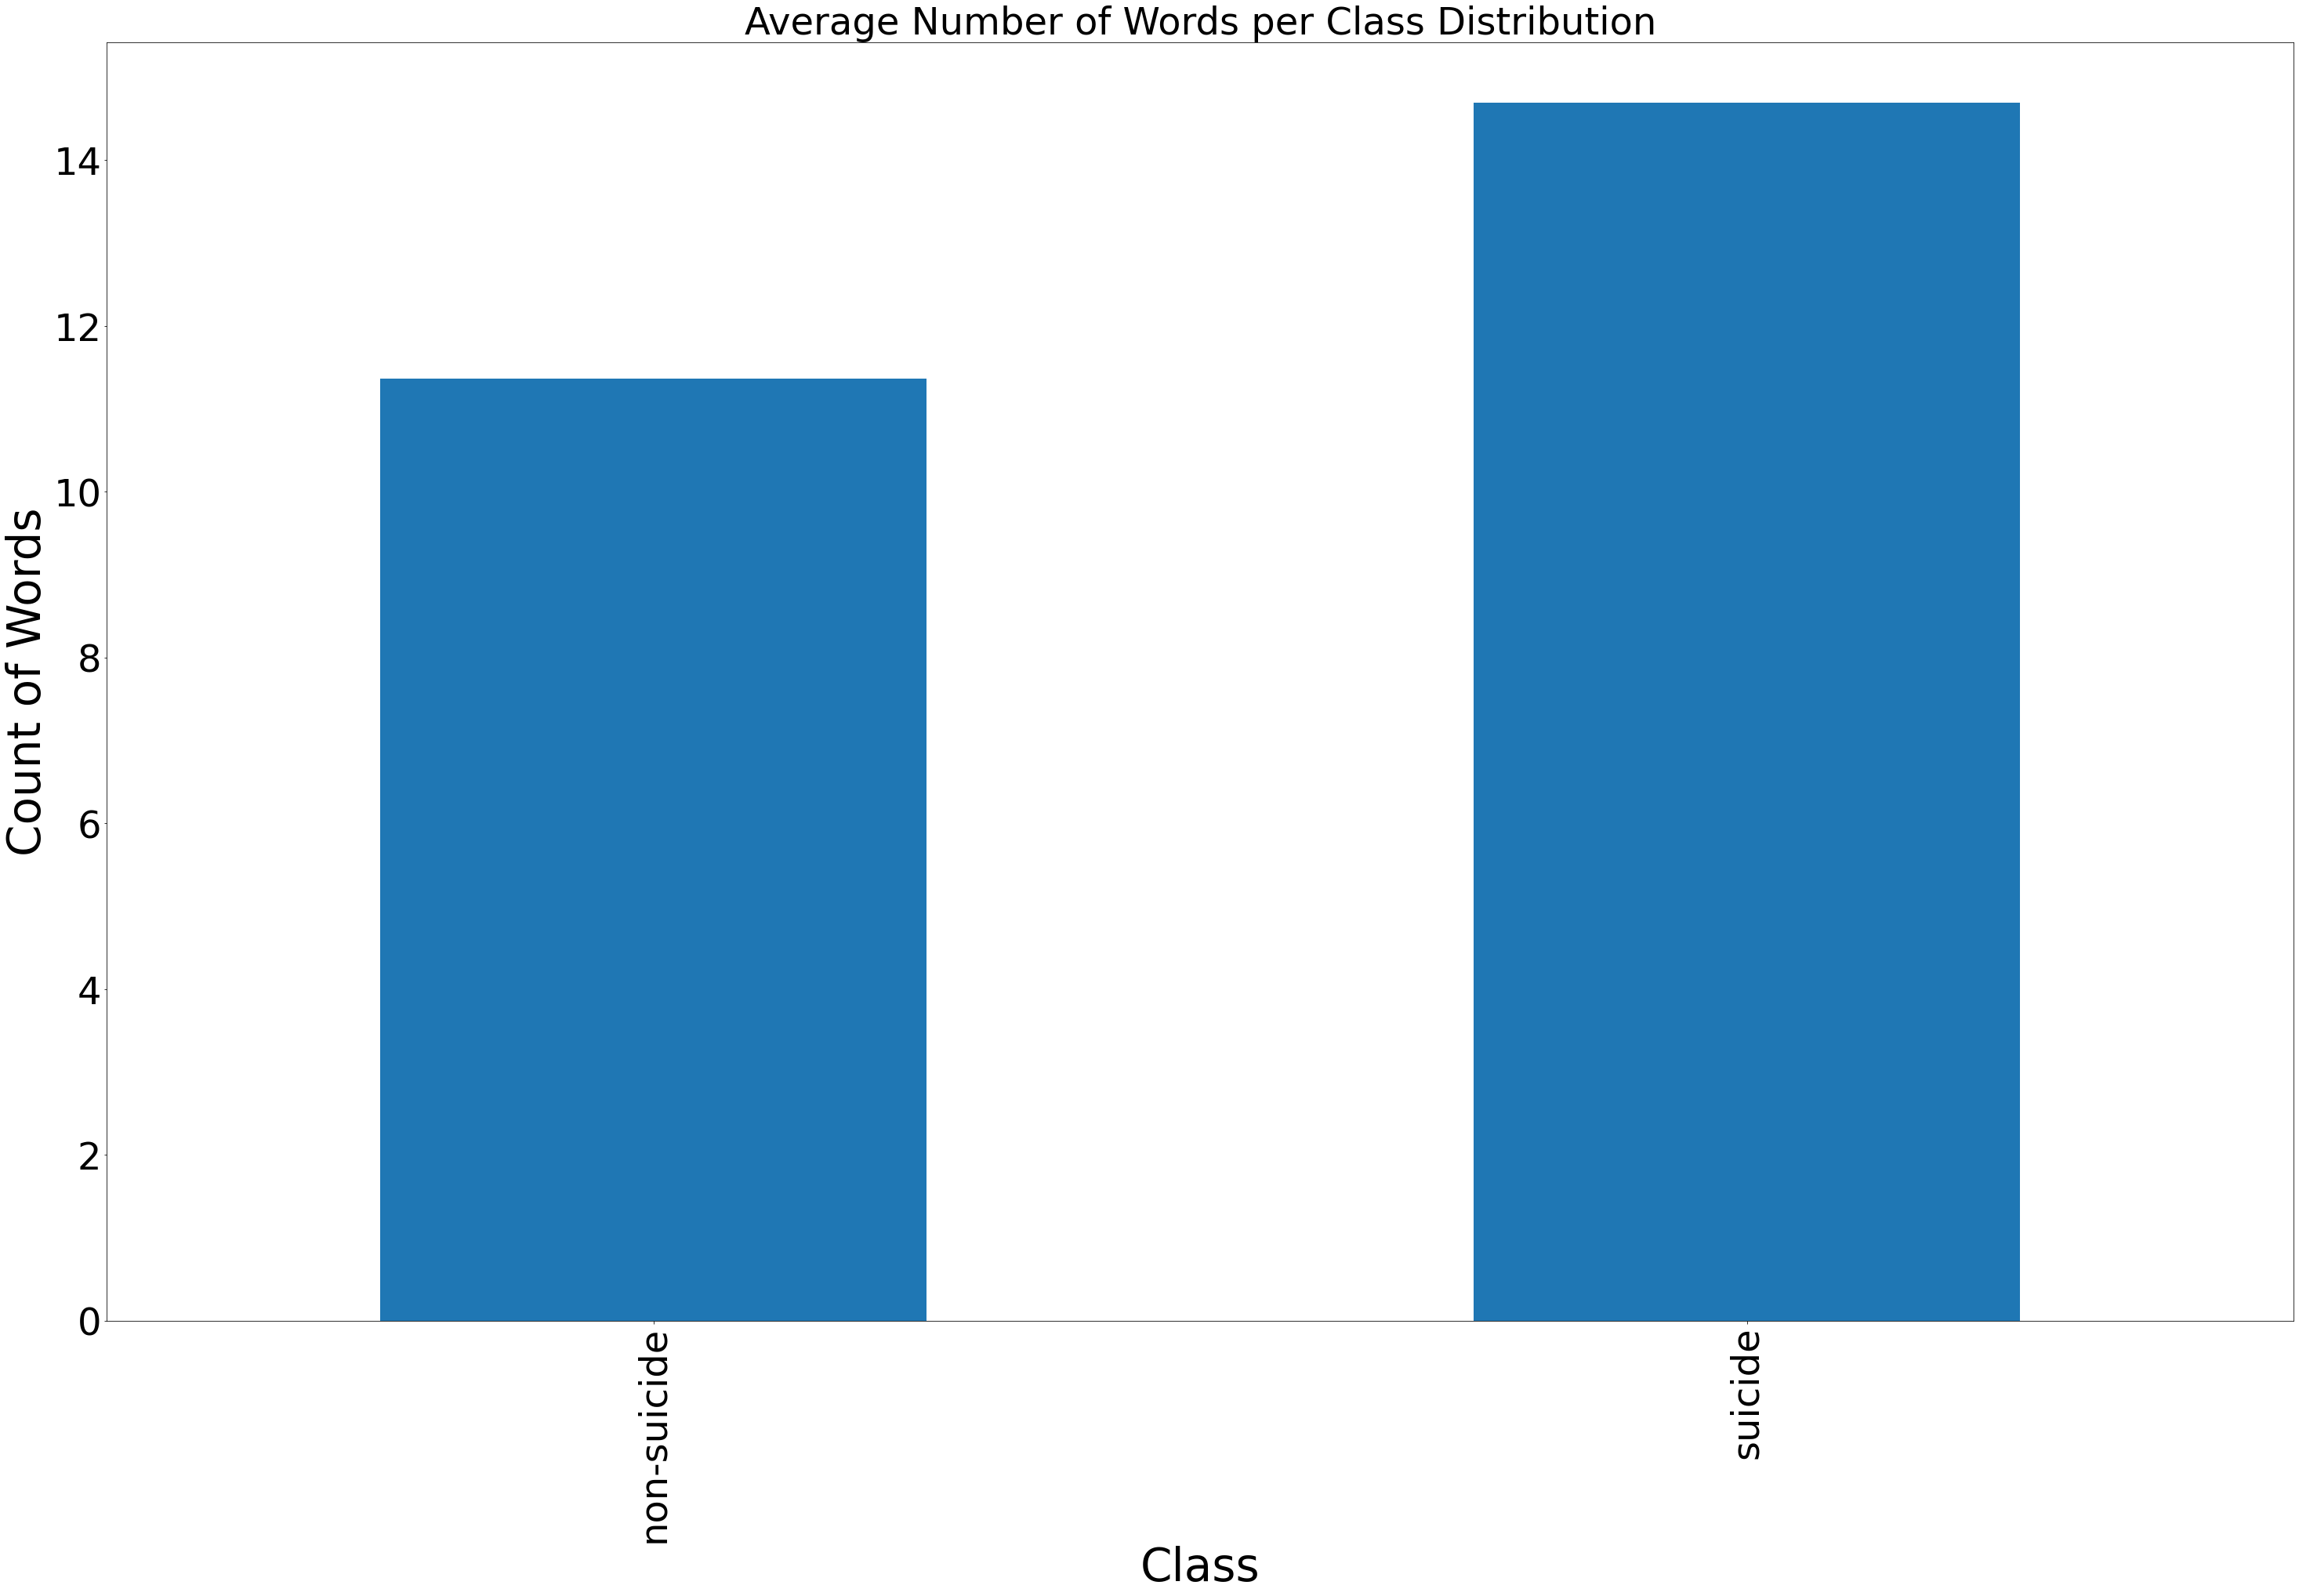

In [20]:
word_avg = T_suicide.groupby('class')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Class', fontsize=58)
plt.ylabel('Count of Words', fontsize=58)
plt.xticks(fontsize=48)
plt.yticks(fontsize=48)
plt.title('Average Number of Words per Class Distribution', fontsize=48)

# save image
plt.savefig("../graph/wordcount_twitter.jpg", bbox_inches = 'tight')
plt.show()

#### 1.2.3: Word Cloud

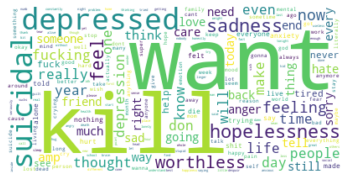

In [21]:
# (Suicide)
# filter the df to one candidate, and create a list of responses from them
text = T_suicide[T_suicide['class'] == 'suicide'].text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(background_color='white',
                      stopwords = STOPWORDS,
                      collocations=False,
                      min_word_length = 3).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

# save image
plt.savefig("../graph/wordcloud(suicide)_twitter.jpg", bbox_inches = 'tight')
plt.show()

In [22]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('want', 453), ('kill', 398), ('depressed', 304), ('suicidal', 280), ('hopelessness', 200)]
[('want', 1.0), ('kill', 0.8785871964679912), ('depressed', 0.6710816777041942), ('suicidal', 0.6181015452538632), ('hopelessness', 0.44150110375275936)]


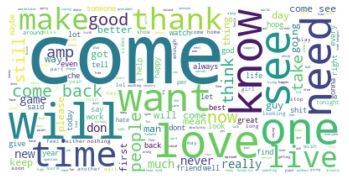

In [23]:
# (Non-Suicide)
# filter the df to one candidate, and create a list of responses from them
text = T_suicide[T_suicide['class'] == 'non-suicide'].text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(background_color='white',
                      stopwords = STOPWORDS,
                      collocations=True,
                      min_word_length = 3).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

# save image
plt.savefig("../graph/wordcloud(non-suicide)_twitter.jpg", bbox_inches = 'tight')
plt.show()

In [24]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('come', 437), ('will', 67), ('love', 58), ('know', 55), ('one', 54)]
[('come', 1.0), ('will', 0.15331807780320367), ('love', 0.13272311212814644), ('know', 0.12585812356979406), ('one', 0.12356979405034325)]


In [25]:
T_suicide.head()

,datetime,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,username,class,lemma_str,sentiment,word_count,review_len
0,2020-01-17 23:59:10+00:00,job and i wouldn’t have to save money toward a...,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...",KaiiiKay,suicide,job save money toward new car could kill live ...,-0.145455,25,142
1,2020-01-17 23:32:32+00:00,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]",MGlmcm,suicide,hate much want kill one care anyway,-0.300000,7,35
2,2020-01-17 23:30:16+00:00,Back on here the cry for help but I don’t want...,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...",Coughin_Up_Love,suicide,back cry help want people close know feel like...,0.000000,24,138
3,2020-01-17 22:57:16+00:00,"Ya ever had that feeling of ""I don't want to k...",Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...",real_red_rabbit,suicide,ya ever feeling dont want kill im goddamn tire...,-0.131818,13,70
4,2020-01-17 22:11:03+00:00,I really want to kill myself just to stop thin...,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]",TALA6955,suicide,really want kill stop thinking,0.200000,5,30


#### 1.2.4: Datetime 
        1.2.4.1: Weekends vs Weekdays
        1.2.4.2: Day of week
        1.2.4.3: Hour of the Day
        1.2.4.4: Part of the day

In [26]:
T_suicide['datetime'] = pd.to_datetime(T_suicide['datetime'])

In [27]:
T_suicide.loc[:, 'hour'] = T_suicide['datetime'].dt.hour
T_suicide.loc[:, 'day_of_week'] = T_suicide['datetime'].dt.dayofweek
T_suicide['day_type'] = 'weekends'
T_suicide['day_type'][T_suicide['datetime'].dt.day_of_week<5] = 'weekdays'
T_suicide['day_type'] = T_suicide['day_type'].astype('category')
T_suicide['day_of_week'] = T_suicide['day_of_week'].astype('category')

<ipython-input-27-75d9a9d461fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_suicide['day_type'][T_suicide['datetime'].dt.day_of_week<5] = 'weekdays'


In [28]:
hour_bins = [0, 6, 12, 16, 23, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Night']
T_suicide['session'] = pd.cut(T_suicide.hour, bins=hour_bins, right=False, labels=labels, ordered=False)

In [29]:
T_suicide.head()

,datetime,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,username,class,lemma_str,sentiment,word_count,review_len,hour,day_of_week,day_type,session
0,2020-01-17 23:59:10+00:00,job and i wouldn’t have to save money toward a...,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...",KaiiiKay,suicide,job save money toward new car could kill live ...,-0.145455,25,142,23,4,weekdays,Night
1,2020-01-17 23:32:32+00:00,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]",MGlmcm,suicide,hate much want kill one care anyway,-0.300000,7,35,23,4,weekdays,Night
2,2020-01-17 23:30:16+00:00,Back on here the cry for help but I don’t want...,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...",Coughin_Up_Love,suicide,back cry help want people close know feel like...,0.000000,24,138,23,4,weekdays,Night
3,2020-01-17 22:57:16+00:00,"Ya ever had that feeling of ""I don't want to k...",Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...",real_red_rabbit,suicide,ya ever feeling dont want kill im goddamn tire...,-0.131818,13,70,22,4,weekdays,Evening
4,2020-01-17 22:11:03+00:00,I really want to kill myself just to stop thin...,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]",TALA6955,suicide,really want kill stop thinking,0.200000,5,30,22,4,weekdays,Evening


#### 1.2.4.1: Weekends vs Weekdays

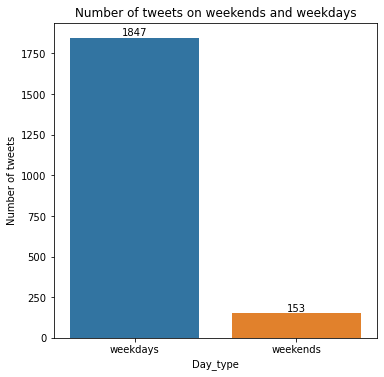

In [30]:
# (Overall)
f, ax = plt.subplots(figsize=(5.8,5.8))
cplot = sns.countplot(data=T_suicide, x='day_type')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom')
    
# save image
plt.savefig("../graph/weekends vs weekdays_twitter.jpg", bbox_inches = 'tight')
cplot.set_title("Number of tweets on weekends and weekdays")
cplot.set_ylabel("Number of tweets")
cplot.set_xlabel("Day_type");

#### 1.4.2.2: Day of week

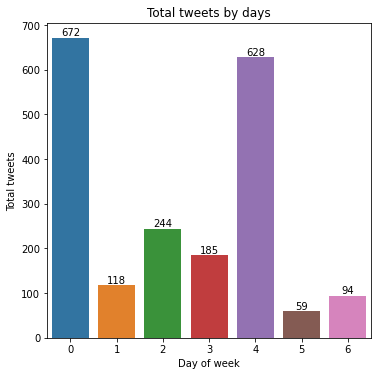

In [31]:
# (Overall)
f, ax = plt.subplots(figsize=(5.8,5.8))
cplot = sns.countplot(data=T_suicide, x='day_of_week')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom')
# save image
plt.savefig("../graph/day of week_twitter.jpg", bbox_inches = 'tight')
cplot.set_title("Total tweets by days")
cplot.set_ylabel("Total tweets")
cplot.set_xlabel("Day of week");

#### 1.4.2.3: Hour of the day

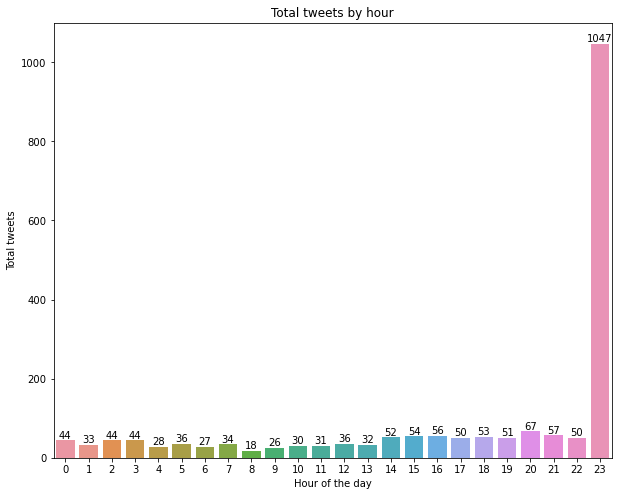

In [32]:
# (Overall)
f, ax = plt.subplots(figsize=(10,8))
cplot = sns.countplot(data=T_suicide, x='hour')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom', fontsize=10)
    
# save image
plt.savefig("../graph/hour of the day_twitter.jpg", bbox_inches = 'tight')
cplot.set_title("Total tweets by hour")
cplot.set_ylabel("Total tweets")
cplot.set_xlabel("Hour of the day");

#### 1.4.2.4: Part of the day

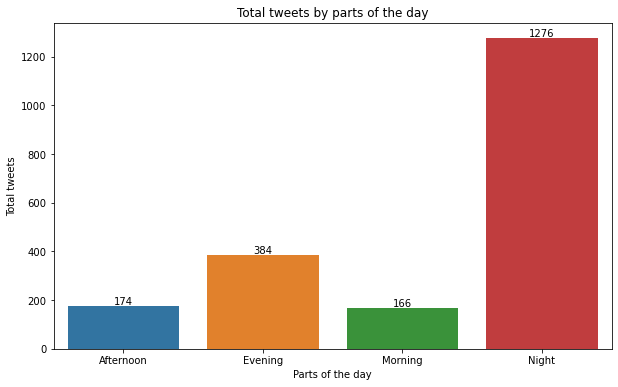

In [33]:
# (Overall)
f, ax = plt.subplots(figsize=(10,6))
cplot = sns.countplot(data=T_suicide, x='session')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom', fontsize=10)

# save image
plt.savefig("../graph/part of the day_twitter.jpg", bbox_inches = 'tight')
cplot.set_title("Total tweets by parts of the day")
cplot.set_ylabel("Total tweets")
cplot.set_xlabel("Parts of the day");

## Reddit's Data
    2.1: Minor data manipulation 
        2.1.1: Remove punctuation 
        2.1.2: Tokenise
        2.1.3: Remove stopwords
        2.1.4: Stemming
        2.1.5: Lemmatization

    2.2: Reddit EDA
        2.2.1: Sentiment Analysis
        2.2.2: Word Count
        2.2.3: Word Cloud

In [34]:
# Importing Reddit's Data
R_suicide = pd.read_csv('../data/R_suicide.csv')

In [35]:
R_suicide.shape

(2000, 2)

In [36]:
R_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   class   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [37]:
R_suicide['class'].value_counts()

non-suicide    1000
suicide        1000
Name: class, dtype: int64

In [38]:
R_suicide.head()

,text,class
0,aight so i need help teenager nation. we must ...,non-suicide
1,Does it take a few false starts sometimes?my m...,non-suicide
2,This one doesn't deserve a titleI just don't u...,non-suicide
3,How shit am I if next year would be my third c...,non-suicide
4,I really want to die im so scaredIm out at a f...,non-suicide


### 2.1: Minor data manipulation 

In [39]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def remove_punct(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct

R_suicide['text_clean'] = R_suicide['text'].apply(lambda x: remove_punct(x)) 

In [41]:
# Tokenization
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

R_suicide['text_tokenised'] = R_suicide['text_clean'].apply(lambda x: tokenize(x.lower()))


In [42]:
def remove_stopwords(tokenised_list):
    text = [word for word in tokenised_list if word not in stopwords]
    return text

R_suicide['text_nostop'] = R_suicide['text_tokenised'].apply(lambda x: remove_stopwords(x))


In [43]:
# Stemming words
def stemming (tokenised_text):
    text = [ps.stem(word) for word in tokenised_text]
    return text

R_suicide['text_stemmed'] = R_suicide['text_nostop']

In [44]:
wn = nltk.WordNetLemmatizer()

In [45]:
def lemmatizing(tokenised_text):
    text = [wn.lemmatize(word) for word in tokenised_text]
    return text

R_suicide['text_lemmatized'] = R_suicide['text_nostop'].apply (lambda x: lemmatizing(x))


In [46]:
# Rearranging columns
R_suicide = R_suicide[['text', 'text_clean', 'text_tokenised', 
                       'text_nostop', 'text_stemmed',
                       'text_lemmatized', 'class']]

R_suicide.head()

,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,class
0,aight so i need help teenager nation. we must ...,aight so i need help teenager nation we must c...,"[aight, so, i, need, help, teenager, nation, w...","[aight, need, help, teenager, nation, must, co...","[aight, need, help, teenager, nation, must, co...","[aight, need, help, teenager, nation, must, co...",non-suicide
1,Does it take a few false starts sometimes?my m...,Does it take a few false starts sometimesmy mo...,"[does, it, take, a, few, false, starts, someti...","[take, false, starts, sometimesmy, mom, passed...","[take, false, starts, sometimesmy, mom, passed...","[take, false, start, sometimesmy, mom, passed,...",non-suicide
2,This one doesn't deserve a titleI just don't u...,This one doesnt deserve a titleI just dont und...,"[this, one, doesnt, deserve, a, titlei, just, ...","[one, doesnt, deserve, titlei, dont, understan...","[one, doesnt, deserve, titlei, dont, understan...","[one, doesnt, deserve, titlei, dont, understan...",non-suicide
3,How shit am I if next year would be my third c...,How shit am I if next year would be my third c...,"[how, shit, am, i, if, next, year, would, be, ...","[shit, next, year, would, third, college, drop...","[shit, next, year, would, third, college, drop...","[shit, next, year, would, third, college, drop...",non-suicide
4,I really want to die im so scaredIm out at a f...,I really want to die im so scaredIm out at a f...,"[i, really, want, to, die, im, so, scaredim, o...","[really, want, die, im, scaredim, friends, clu...","[really, want, die, im, scaredim, friends, clu...","[really, want, die, im, scaredim, friend, club...",non-suicide


### 2.2: Reddit EDA

#### 2.2.1: Sentiment Analysis

In [47]:
R_suicide['lemma_str'] = [' '.join(map(str,l)) for l in R_suicide['text_lemmatized']]
R_suicide.head()

,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,class,lemma_str
0,aight so i need help teenager nation. we must ...,aight so i need help teenager nation we must c...,"[aight, so, i, need, help, teenager, nation, w...","[aight, need, help, teenager, nation, must, co...","[aight, need, help, teenager, nation, must, co...","[aight, need, help, teenager, nation, must, co...",non-suicide,aight need help teenager nation must come toge...
1,Does it take a few false starts sometimes?my m...,Does it take a few false starts sometimesmy mo...,"[does, it, take, a, few, false, starts, someti...","[take, false, starts, sometimesmy, mom, passed...","[take, false, starts, sometimesmy, mom, passed...","[take, false, start, sometimesmy, mom, passed,...",non-suicide,take false start sometimesmy mom passed away s...
2,This one doesn't deserve a titleI just don't u...,This one doesnt deserve a titleI just dont und...,"[this, one, doesnt, deserve, a, titlei, just, ...","[one, doesnt, deserve, titlei, dont, understan...","[one, doesnt, deserve, titlei, dont, understan...","[one, doesnt, deserve, titlei, dont, understan...",non-suicide,one doesnt deserve titlei dont understand head...
3,How shit am I if next year would be my third c...,How shit am I if next year would be my third c...,"[how, shit, am, i, if, next, year, would, be, ...","[shit, next, year, would, third, college, drop...","[shit, next, year, would, third, college, drop...","[shit, next, year, would, third, college, drop...",non-suicide,shit next year would third college dropping la...
4,I really want to die im so scaredIm out at a f...,I really want to die im so scaredIm out at a f...,"[i, really, want, to, die, im, so, scaredim, o...","[really, want, die, im, scaredim, friends, clu...","[really, want, die, im, scaredim, friends, clu...","[really, want, die, im, scaredim, friend, club...",non-suicide,really want die im scaredim friend club im fee...


In [48]:
R_suicide['sentiment'] = R_suicide['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
R_suicide.head()

,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,class,lemma_str,sentiment
0,aight so i need help teenager nation. we must ...,aight so i need help teenager nation we must c...,"[aight, so, i, need, help, teenager, nation, w...","[aight, need, help, teenager, nation, must, co...","[aight, need, help, teenager, nation, must, co...","[aight, need, help, teenager, nation, must, co...",non-suicide,aight need help teenager nation must come toge...,0.178788
1,Does it take a few false starts sometimes?my m...,Does it take a few false starts sometimesmy mo...,"[does, it, take, a, few, false, starts, someti...","[take, false, starts, sometimesmy, mom, passed...","[take, false, starts, sometimesmy, mom, passed...","[take, false, start, sometimesmy, mom, passed,...",non-suicide,take false start sometimesmy mom passed away s...,-0.133333
2,This one doesn't deserve a titleI just don't u...,This one doesnt deserve a titleI just dont und...,"[this, one, doesnt, deserve, a, titlei, just, ...","[one, doesnt, deserve, titlei, dont, understan...","[one, doesnt, deserve, titlei, dont, understan...","[one, doesnt, deserve, titlei, dont, understan...",non-suicide,one doesnt deserve titlei dont understand head...,-0.094133
3,How shit am I if next year would be my third c...,How shit am I if next year would be my third c...,"[how, shit, am, i, if, next, year, would, be, ...","[shit, next, year, would, third, college, drop...","[shit, next, year, would, third, college, drop...","[shit, next, year, would, third, college, drop...",non-suicide,shit next year would third college dropping la...,-0.103333
4,I really want to die im so scaredIm out at a f...,I really want to die im so scaredIm out at a f...,"[i, really, want, to, die, im, so, scaredim, o...","[really, want, die, im, scaredim, friends, clu...","[really, want, die, im, scaredim, friends, clu...","[really, want, die, im, scaredim, friend, club...",non-suicide,really want die im scaredim friend club im fee...,-0.276364


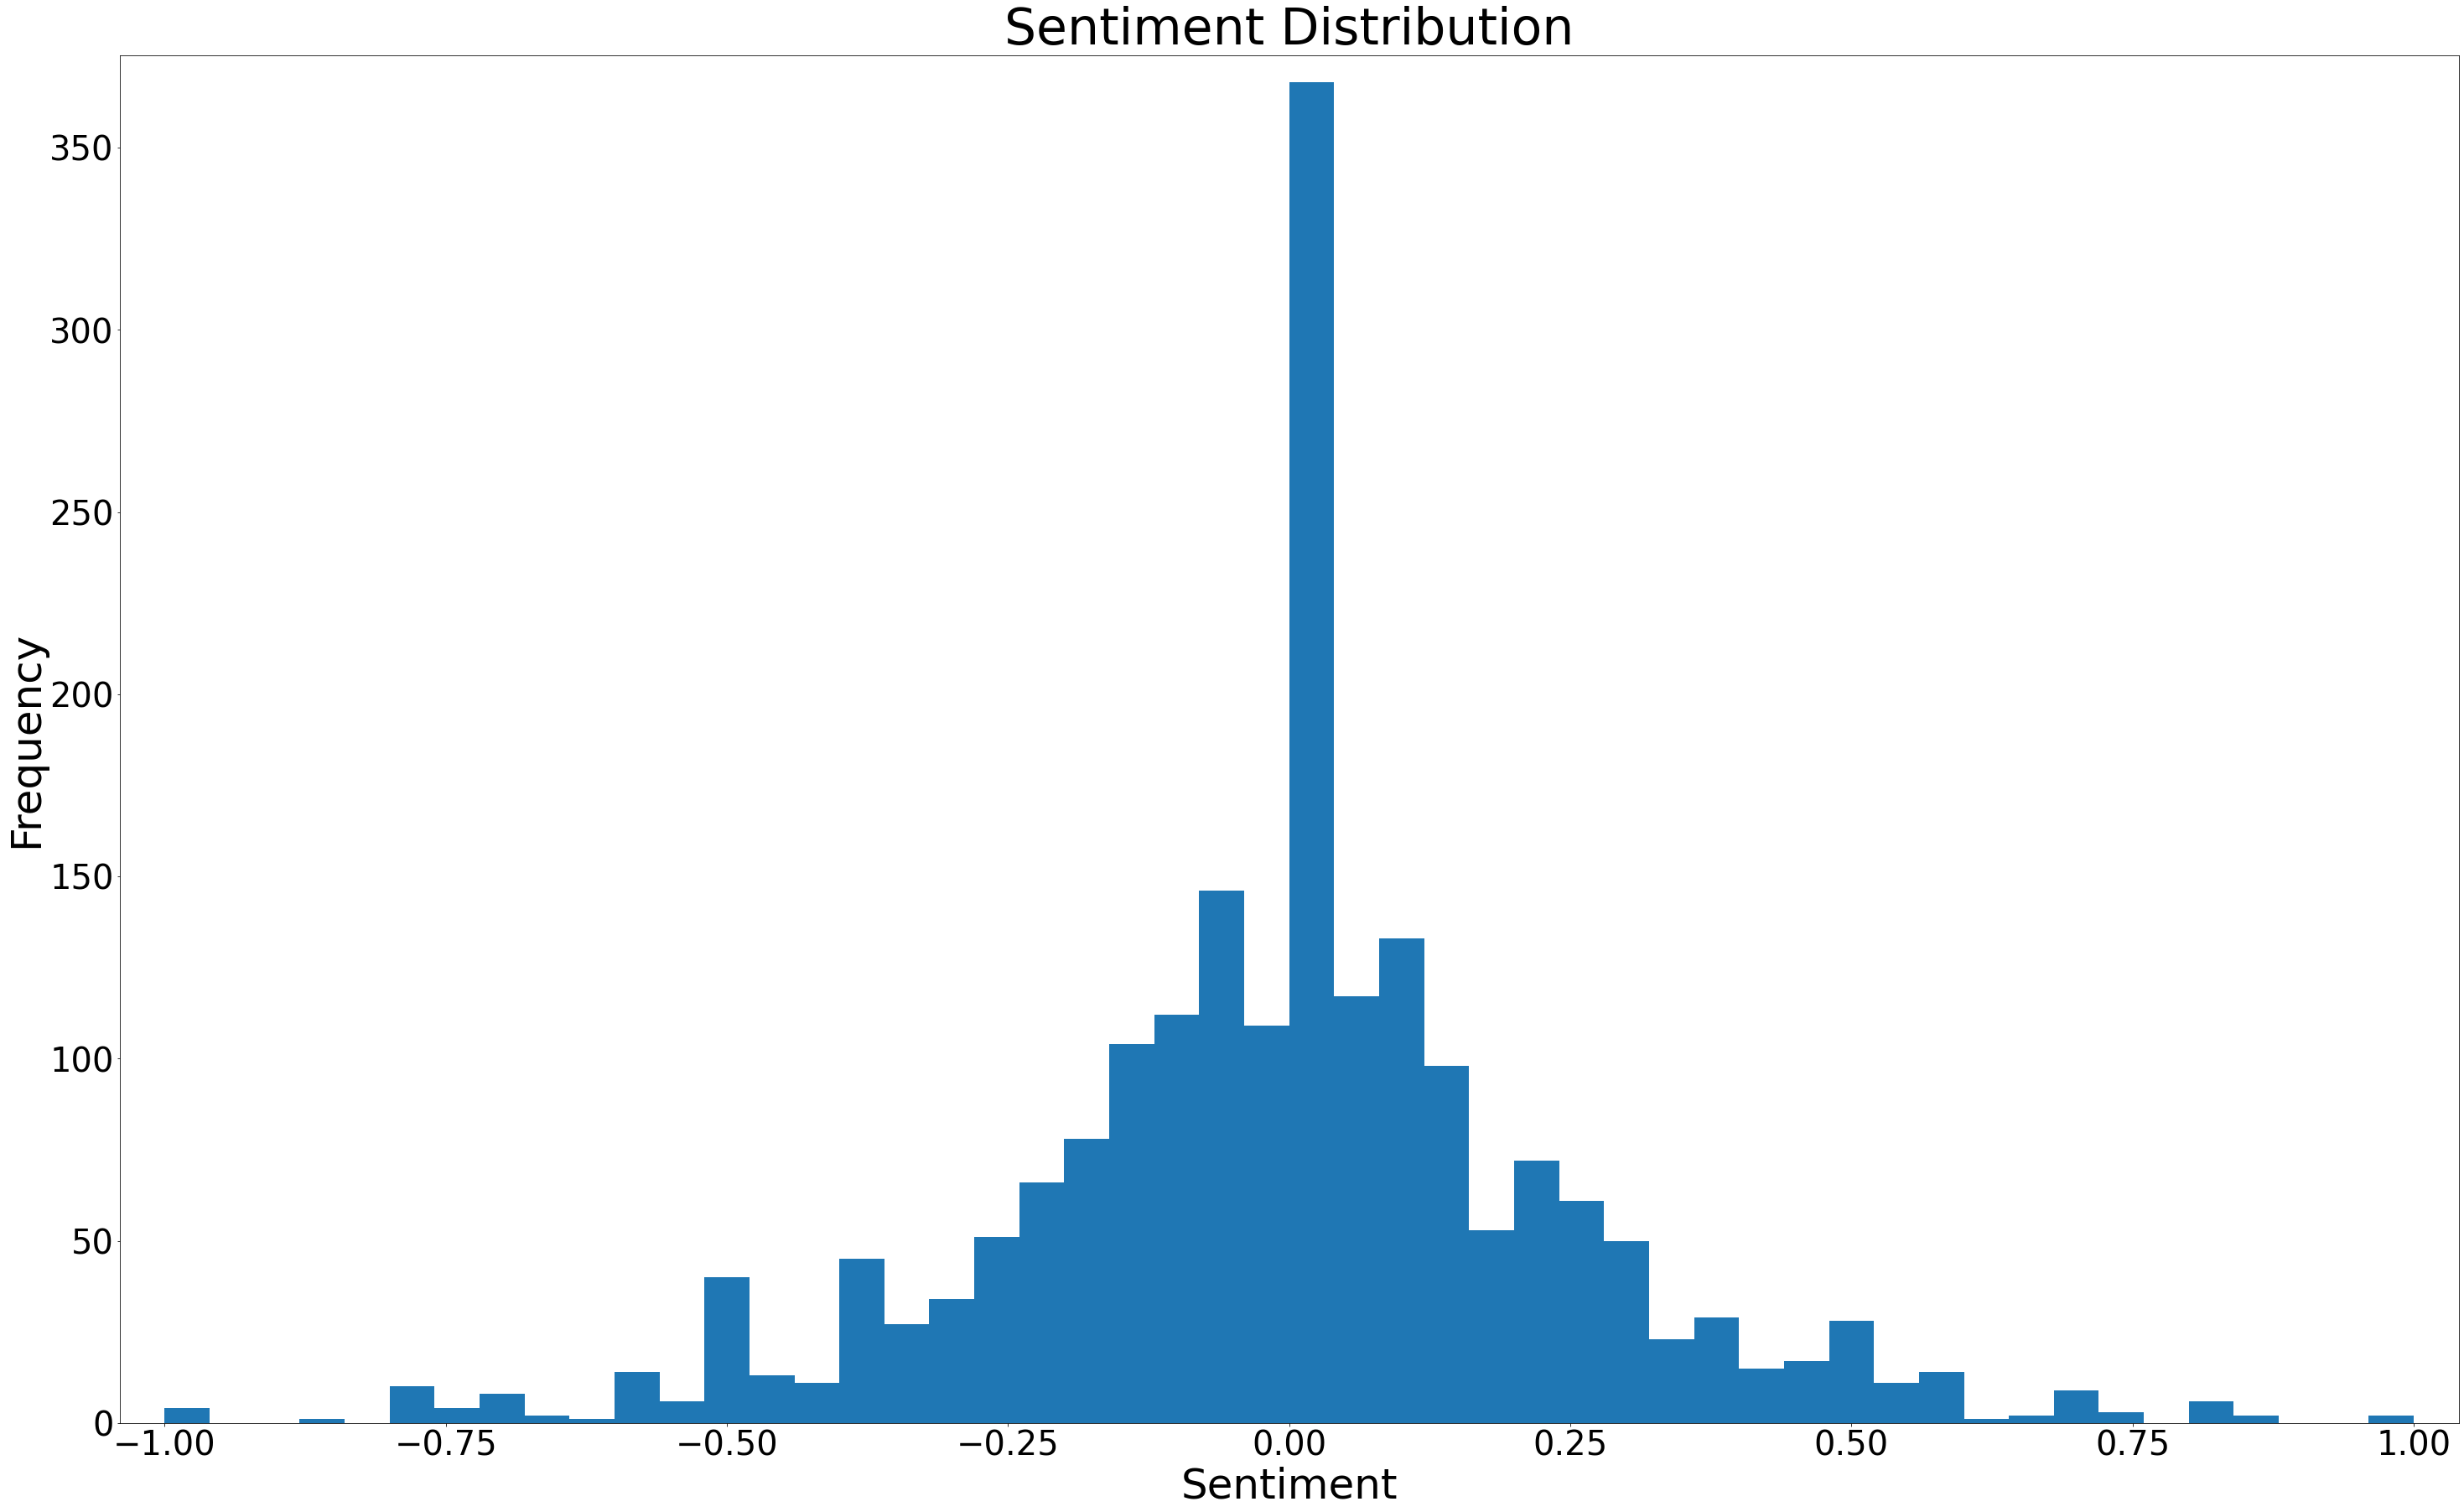

In [49]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(R_suicide['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)

# save image
plt.savefig("../graph/sentiment_reddit.jpg", bbox_inches = 'tight')
plt.show()

#### 2.2.2: Word Count

In [50]:
T_suicide['word_count'] = T_suicide['text_lemmatized'].apply(lambda x: len(str(x).split()))
T_suicide['review_len'] = T_suicide['lemma_str'].astype(str).apply(len)
T_suicide.head()

,datetime,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,username,class,lemma_str,sentiment,word_count,review_len,hour,day_of_week,day_type,session
0,2020-01-17 23:59:10+00:00,job and i wouldn’t have to save money toward a...,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...",KaiiiKay,suicide,job save money toward new car could kill live ...,-0.145455,25,142,23,4,weekdays,Night
1,2020-01-17 23:32:32+00:00,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]",MGlmcm,suicide,hate much want kill one care anyway,-0.300000,7,35,23,4,weekdays,Night
2,2020-01-17 23:30:16+00:00,Back on here the cry for help but I don’t want...,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...",Coughin_Up_Love,suicide,back cry help want people close know feel like...,0.000000,24,138,23,4,weekdays,Night
3,2020-01-17 22:57:16+00:00,"Ya ever had that feeling of ""I don't want to k...",Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...",real_red_rabbit,suicide,ya ever feeling dont want kill im goddamn tire...,-0.131818,13,70,22,4,weekdays,Evening
4,2020-01-17 22:11:03+00:00,I really want to kill myself just to stop thin...,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]",TALA6955,suicide,really want kill stop thinking,0.200000,5,30,22,4,weekdays,Evening


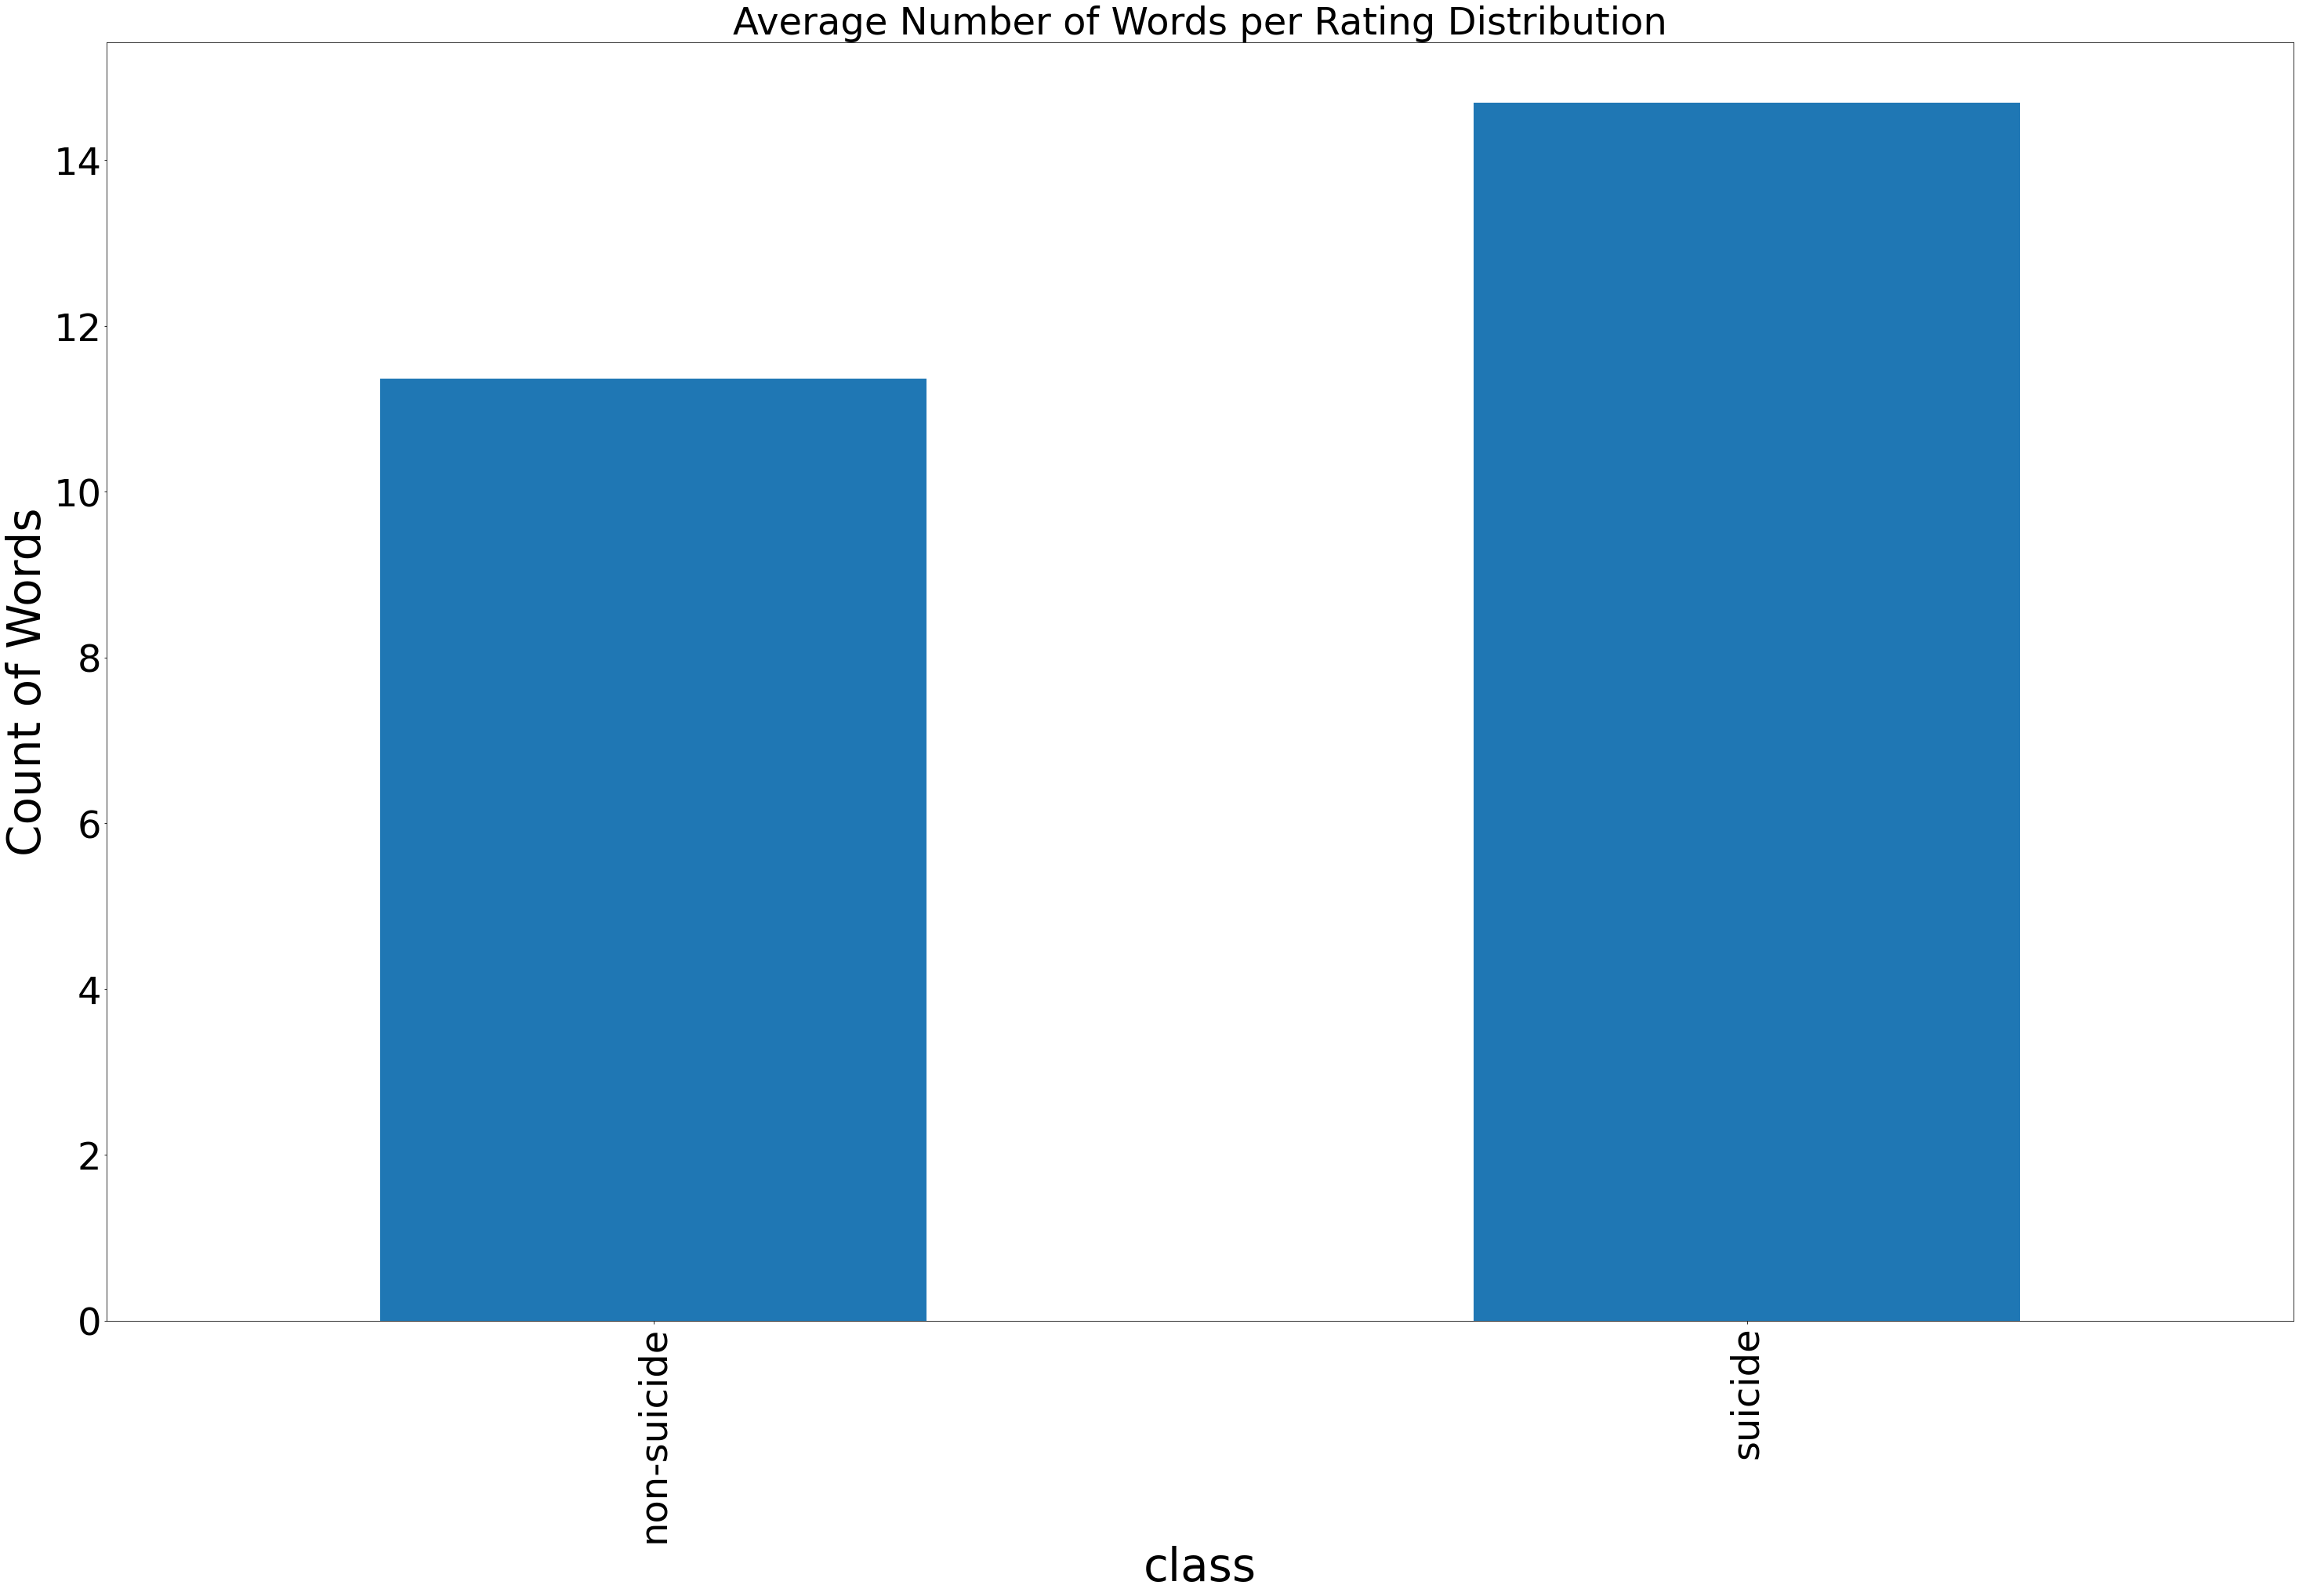

In [51]:
word_avg = T_suicide.groupby('class')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('class', fontsize=58)
plt.ylabel('Count of Words', fontsize=58)
plt.xticks(fontsize=48)
plt.yticks(fontsize=48)
plt.title('Average Number of Words per Rating Distribution', fontsize=48)

# save image
plt.savefig("../graph/wordcount_reddit.jpg", bbox_inches = 'tight')
plt.show()

#### 2.2.3: Word Cloud

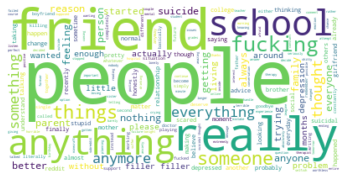

In [52]:
# (Suicide)
# filter the df to one candidate, and create a list of responses from them
text = R_suicide[R_suicide['class'] == 'suicide'].text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(background_color='white',
                      stopwords = STOPWORDS,
                      collocations=True,
                      min_word_length = 6).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

# save image
plt.savefig("../graph/wordcloud(suicide)_reddit.jpg", bbox_inches = 'tight')
plt.show()

In [53]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('people', 420), ('friend', 364), ('really', 288), ('anything', 223), ('school', 221)]
[('people', 1.0), ('friend', 0.8666666666666667), ('really', 0.6857142857142857), ('anything', 0.530952380952381), ('school', 0.5261904761904762)]


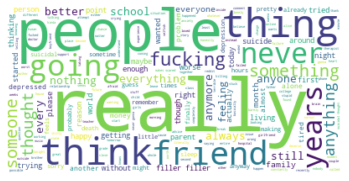

In [54]:
# (Non-Suicide)
# filter the df to one candidate, and create a list of responses from them
text = R_suicide[R_suicide['class'] == 'non-suicide'].text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(background_color='white',
                      stopwords = STOPWORDS,
                      collocations=True,
                      min_word_length = 5).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

# save image
plt.savefig("../graph/wordcloud(non-suicide)_reddit.jpg", bbox_inches = 'tight')
plt.show()

In [55]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('really', 393), ('people', 390), ('thing', 356), ('think', 326), ('friend', 322)]
[('really', 1.0), ('people', 0.9923664122137404), ('thing', 0.905852417302799), ('think', 0.8295165394402035), ('friend', 0.8193384223918575)]


## Combining Twitter and Reddit
        3.1: 2-gram
        3.2: 3-gram
        3.3: Word Cloud

In [56]:
T_suicide.head()

,datetime,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,username,class,lemma_str,sentiment,word_count,review_len,hour,day_of_week,day_type,session
0,2020-01-17 23:59:10+00:00,job and i wouldn’t have to save money toward a...,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...",KaiiiKay,suicide,job save money toward new car could kill live ...,-0.145455,25,142,23,4,weekdays,Night
1,2020-01-17 23:32:32+00:00,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]",MGlmcm,suicide,hate much want kill one care anyway,-0.300000,7,35,23,4,weekdays,Night
2,2020-01-17 23:30:16+00:00,Back on here the cry for help but I don’t want...,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...",Coughin_Up_Love,suicide,back cry help want people close know feel like...,0.000000,24,138,23,4,weekdays,Night
3,2020-01-17 22:57:16+00:00,"Ya ever had that feeling of ""I don't want to k...",Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...",real_red_rabbit,suicide,ya ever feeling dont want kill im goddamn tire...,-0.131818,13,70,22,4,weekdays,Evening
4,2020-01-17 22:11:03+00:00,I really want to kill myself just to stop thin...,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]",TALA6955,suicide,really want kill stop thinking,0.200000,5,30,22,4,weekdays,Evening


In [57]:
# Dropping column
T_suicide.drop(['datetime'], axis = 1, inplace = True)
T_suicide.drop(['username'], axis = 1, inplace = True)

# To check
T_suicide.head()

,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,class,lemma_str,sentiment,word_count,review_len,hour,day_of_week,day_type,session
0,job and i wouldn’t have to save money toward a...,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...",suicide,job save money toward new car could kill live ...,-0.145455,25,142,23,4,weekdays,Night
1,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]",suicide,hate much want kill one care anyway,-0.300000,7,35,23,4,weekdays,Night
2,Back on here the cry for help but I don’t want...,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...",suicide,back cry help want people close know feel like...,0.000000,24,138,23,4,weekdays,Night
3,"Ya ever had that feeling of ""I don't want to k...",Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...",suicide,ya ever feeling dont want kill im goddamn tire...,-0.131818,13,70,22,4,weekdays,Evening
4,I really want to kill myself just to stop thin...,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]",suicide,really want kill stop thinking,0.200000,5,30,22,4,weekdays,Evening


In [58]:
T_suicide.shape

(2000, 15)

In [59]:
R_suicide.shape

(2000, 9)

In [60]:
R_suicide.head()

,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,class,lemma_str,sentiment
0,aight so i need help teenager nation. we must ...,aight so i need help teenager nation we must c...,"[aight, so, i, need, help, teenager, nation, w...","[aight, need, help, teenager, nation, must, co...","[aight, need, help, teenager, nation, must, co...","[aight, need, help, teenager, nation, must, co...",non-suicide,aight need help teenager nation must come toge...,0.178788
1,Does it take a few false starts sometimes?my m...,Does it take a few false starts sometimesmy mo...,"[does, it, take, a, few, false, starts, someti...","[take, false, starts, sometimesmy, mom, passed...","[take, false, starts, sometimesmy, mom, passed...","[take, false, start, sometimesmy, mom, passed,...",non-suicide,take false start sometimesmy mom passed away s...,-0.133333
2,This one doesn't deserve a titleI just don't u...,This one doesnt deserve a titleI just dont und...,"[this, one, doesnt, deserve, a, titlei, just, ...","[one, doesnt, deserve, titlei, dont, understan...","[one, doesnt, deserve, titlei, dont, understan...","[one, doesnt, deserve, titlei, dont, understan...",non-suicide,one doesnt deserve titlei dont understand head...,-0.094133
3,How shit am I if next year would be my third c...,How shit am I if next year would be my third c...,"[how, shit, am, i, if, next, year, would, be, ...","[shit, next, year, would, third, college, drop...","[shit, next, year, would, third, college, drop...","[shit, next, year, would, third, college, drop...",non-suicide,shit next year would third college dropping la...,-0.103333
4,I really want to die im so scaredIm out at a f...,I really want to die im so scaredIm out at a f...,"[i, really, want, to, die, im, so, scaredim, o...","[really, want, die, im, scaredim, friends, clu...","[really, want, die, im, scaredim, friends, clu...","[really, want, die, im, scaredim, friend, club...",non-suicide,really want die im scaredim friend club im fee...,-0.276364


In [61]:
# Merging Twitter and Reddit 
suicide_merged = pd.concat([T_suicide, R_suicide], ignore_index = True)

In [62]:
suicide_merged.shape

(4000, 15)

In [63]:
suicide_merged.head()

,text,text_clean,text_tokenised,text_nostop,text_stemmed,text_lemmatized,class,lemma_str,sentiment,word_count,review_len,hour,day_of_week,day_type,session
0,job and i wouldn’t have to save money toward a...,job and i wouldn’t have to save money toward a...,"[job, and, i, wouldn, t, have, to, save, money...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...","[job, save, money, toward, new, car, could, ki...",suicide,job save money toward new car could kill live ...,-0.145455,25.0,142.0,23.0,4,weekdays,Night
1,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,I HATE ME SO MUCH I WANT TO KILL MYSELF NO ONE...,"[i, hate, me, so, much, i, want, to, kill, mys...","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]","[hate, much, want, kill, one, care, anyway]",suicide,hate much want kill one care anyway,-0.300000,7.0,35.0,23.0,4,weekdays,Night
2,Back on here the cry for help but I don’t want...,Back on here the cry for help but I don’t want...,"[back, on, here, the, cry, for, help, but, i, ...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...","[back, cry, help, want, people, close, know, f...",suicide,back cry help want people close know feel like...,0.000000,24.0,138.0,23.0,4,weekdays,Night
3,"Ya ever had that feeling of ""I don't want to k...",Ya ever had that feeling of I dont want to kil...,"[ya, ever, had, that, feeling, of, i, dont, wa...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...","[ya, ever, feeling, dont, want, kill, im, godd...",suicide,ya ever feeling dont want kill im goddamn tire...,-0.131818,13.0,70.0,22.0,4,weekdays,Evening
4,I really want to kill myself just to stop thin...,I really want to kill myself just to stop thin...,"[i, really, want, to, kill, myself, just, to, ...","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]","[really, want, kill, stop, thinking]",suicide,really want kill stop thinking,0.200000,5.0,30.0,22.0,4,weekdays,Evening


In [64]:
suicide_merged['class'].value_counts()

non-suicide    2000
suicide        2000
Name: class, dtype: int64

In [65]:
# Exporting
suicide_merged.to_csv('../data/suicide_merged.csv', index = False)

#### 3.1: 2 - gram

In [66]:
ADDITIONAL_STOPWORDS = ['covfefe']

In [67]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [68]:
# (Overall)
words = basic_clean(''.join(str(suicide_merged['text'].tolist())))

In [69]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[6:16]

(oof, oof)               286
(want, kill)             279
(filler, filler)         168
(im, going)              154
(like, im)               124
(depressed, suicidal)    117
(want, die)              116
(know, im)               105
(dont, even)             102
(every, day)              97
dtype: int64

In [70]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[6:16]

Text(0.5, 51.0, '# of Occurances')

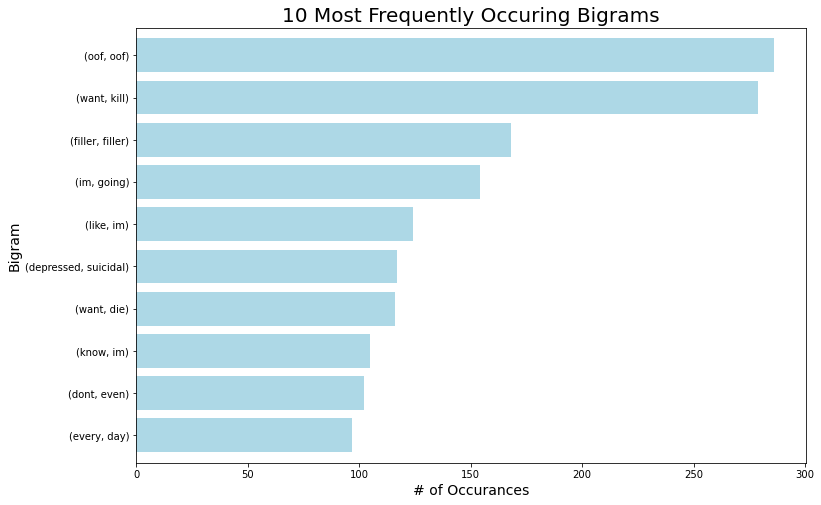

In [71]:
# Visualisation
bigrams_series.sort_values().plot.barh(color='lightblue', width=.8, figsize=(12, 8))

# save image
plt.savefig("../graph/2gram_combined.jpg", bbox_inches = 'tight')
plt.title('10 Most Frequently Occuring Bigrams', fontsize=20)
plt.ylabel('Bigram', fontsize=14)
plt.xlabel('# of Occurances', fontsize=14)

#### 3.2: 3 - gram

In [72]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[8:18]

(im, sorry, im)         32
(dont, know, im)        32
(sorry, im, sorry)      30
(dont, want, live)      26
(alt, alt, alt)         24
(want, kill, want)      22
(dont, feel, like)      22
(every, single, day)    17
(dont, want, hurt)      17
(want, kill, im)        17
dtype: int64

In [73]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[8:18]

Text(0.5, 51.0, '# of Occurances')

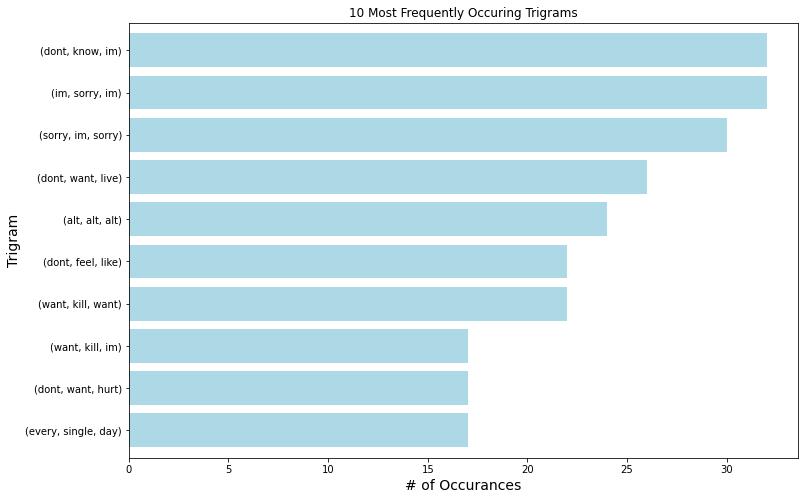

In [74]:
# Visualisation
trigrams_series.sort_values().plot.barh(color='lightblue', width=.8, figsize=(12, 8))

# save image
plt.savefig("../graph/3gram_combined.jpg", bbox_inches = 'tight')
plt.title('10 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram', fontsize=14)
plt.xlabel('# of Occurances', fontsize=14)

#### 3.3: Word Cloud

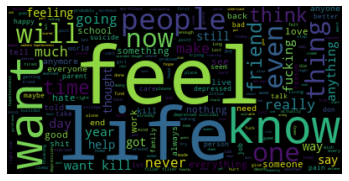

In [75]:
# (Suicide)
# filter the df to one candidate, and create a list of responses from them
text = suicide_merged[suicide_merged['class'] == 'suicide'].text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True,
                      min_word_length = 3).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [76]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('feel', 622), ('life', 541), ('know', 533), ('want', 524), ('people', 486)]
[('feel', 1.0), ('life', 0.8697749196141479), ('know', 0.8569131832797428), ('want', 0.842443729903537), ('people', 0.7813504823151125)]


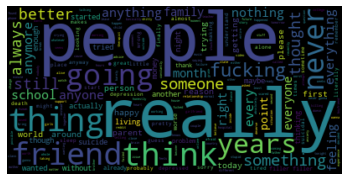

In [77]:
# (Non-Suicide)
# filter the df to one candidate, and create a list of responses from them
text = suicide_merged[suicide_merged['class'] == 'non-suicide'].text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True,
                      min_word_length = 5).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [78]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('people', 427), ('really', 422), ('thing', 380), ('think', 355), ('friend', 340)]
[('people', 1.0), ('really', 0.9882903981264637), ('thing', 0.8899297423887588), ('think', 0.8313817330210773), ('friend', 0.7962529274004684)]


## Vectorization of Data:
    4.1: Count Vectorization
    4.2: N-gram
    4.3: TF - IDF

#### 4.1: Count Vectorization

In [79]:
def clean_text(text):
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [80]:
count_vect = CountVectorizer(analyzer = clean_text)
X_counts = count_vect.fit_transform(suicide_merged['text'])

print (X_counts.shape)
print (count_vect.get_feature_names())

(4000, 11893)
['', '0', '000000000000000000000000000000000', '010', '0100', '010918', '0358093445', '04', '06', '087095577', '1', '10', '100', '1000', '100000yr', '10001', '1000kg', '100200', '100mg', '100mph', '101', '1010', '101030', '1013', '1014', '1015', '1019', '1023', '1030', '1045', '1059', '10h', '10k', '10th', '10x', '10year', '11', '110', '1100', '111', '1122448816', '113', '1140', '1145pm300', '117', '11am', '11th', '12', '1200', '121', '1213', '1214', '1237am', '1245pm', '1265', '128', '12g', '13', '131', '1314', '1318', '1338', '135', '135140', '13th', '14', '1400', '140lb', '1415', '1417', '145', '146', '14f', '14ish', '15', '150', '1500', '150000', '15001800month', '1516', '15225', '158', '15g', '15sophomor', '15th', '15x', '15yo', '16', '160', '1600', '1618', '164', '16f', '16m', '16th', '17', '170', '1718', '172', '175', '176', '1776', '17fi', '17k', '17m', '17th', '18', '180', '18002738255', '1829', '183', '1860', '18f', '18m', '18mcanada', '18th', '19', '192021', '1

In [81]:
X_counts

<4000x11893 sparse matrix of type '<class 'numpy.int64'>'
	with 116665 stored elements in Compressed Sparse Row format>

In [82]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,11883,11884,11885,11886,11887,11888,11889,11890,11891,11892
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Exporting 
X_counts_df.to_csv('../data/X_counts_df.csv')

#### 4.2: N - gram

In [84]:
# Apply CountVectorizer (w/ N-Grams)

ngram_vect = CountVectorizer(ngram_range =(2,2))
X_counts = ngram_vect.fit_transform(suicide_merged['text'])

print(X_counts.shape)

print(ngram_vect.get_feature_names())

(4000, 118223)
['00 am', '00 and', '00 dm', '00 pm', '00 so', '00 was', '00 wtf', '000 are', '000 because', '000 in', '000 it', '000 life', '000 miles', '000 would', '000 yr', '000000000000000000000000000000000 000000000000000000000000000000000', '000mg she', '00am crying', '01 00', '010918 then', '03 5809', '04 am', '05 aka', '06 isn', '087 095', '095 577', '10 00', '10 10', '10 100', '10 12', '10 13', '10 14', '10 15', '10 23', '10 30', '10 45', '10 59', '10 and', '10 beers', '10 boris', '10 but', '10 cars', '10 chops', '10 cobb', '10 curly', '10 deadliest', '10 dollars', '10 feet', '10 for', '10 fps', '10 gala', '10 ganon', '10 gauge', '10 god', '10 got', '10 hambo', '10 hour', '10 hours', '10 hugh', '10 in', '10 kevin', '10 kids', '10 lbs', '10 lucy', '10 maggie', '10 makrs', '10 marks', '10 min', '10 mins', '10 minutes', '10 month', '10 months', '10 not', '10 of', '10 off', '10 or', '10 pages', '10 pancetti', '10 peeps', '10 peggy', '10 people', '10 per', '10 pigleg', '10 pounds',

#### 4.3: TF- IDF (Term Frequency - Inverse Document Frequency)

In [85]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(suicide_merged['text'])

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(4000, 11893)
['', '0', '000000000000000000000000000000000', '010', '0100', '010918', '0358093445', '04', '06', '087095577', '1', '10', '100', '1000', '100000yr', '10001', '1000kg', '100200', '100mg', '100mph', '101', '1010', '101030', '1013', '1014', '1015', '1019', '1023', '1030', '1045', '1059', '10h', '10k', '10th', '10x', '10year', '11', '110', '1100', '111', '1122448816', '113', '1140', '1145pm300', '117', '11am', '11th', '12', '1200', '121', '1213', '1214', '1237am', '1245pm', '1265', '128', '12g', '13', '131', '1314', '1318', '1338', '135', '135140', '13th', '14', '1400', '140lb', '1415', '1417', '145', '146', '14f', '14ish', '15', '150', '1500', '150000', '15001800month', '1516', '15225', '158', '15g', '15sophomor', '15th', '15x', '15yo', '16', '160', '1600', '1618', '164', '16f', '16m', '16th', '17', '170', '1718', '172', '175', '176', '1776', '17fi', '17k', '17m', '17th', '18', '180', '18002738255', '1829', '183', '1860', '18f', '18m', '18mcanada', '18th', '19', '192021', '1

In [86]:
# Sparse matrics
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df


,,0,000000000000000000000000000000000,010,0100,010918,0358093445,04,06,087095577,...,𝙹リᓵᒷ,𝙹リℸ,𝙹リꖎ,𝙹ꖎ,𝙹ꖎᒷᓭ𝙹ᒲᒷ,𝙹ꖎꖎ,𝙹ꖎꖎℸ,𝙹𝙹,𝙹𝙹ℸ,𝙹𝙹リ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.083044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# Exporting 
X_tfidf_df.to_csv('../data/X_tfidf_df.csv')

### Summary of findings (EDA)

1. For my first EDA, we will be looking at the breakdown of the usage of Twitter across the week. As you can see from: Fig 1, it shows the diff in the usage of twitter on weekdays as compared to weekends. In fig 2, instead it shows the breakdown of each day and the corresponding twitter usage. 0 here stands for mondays and 6 stands for sunday respectively. As you can also see from fig 2 twitter has the highest traffic flow on Mondays and fridays while saturdays has the worst usage. According to Sprout Social, a social media. (social media management and optimization platform) The days that records the most usage is wed and fri while the worst day would be sat.


2. For the next EDA we will be focusing on which portion of the day be it morning, night, afternoon. That gets the most tweets. Similar to the earlier graphs, fig 3 (the one on the right) shows the overall usage of tweets according to the portion of the day. With night having the most tweets activity. Fig 4, shows the breakdown according to the hour of the day. 0 (on the left side of the graph) representing 12pm and 23 (on the right side of the graph) representing 11pm.It can be seen from the graph that the tweet activity levels gradually low within the range of (4pm to 8pm) and activities gradually increase nearing the later hours. Reaching an all time high at 11pm. A possible reason is that people with suicidal tendencies and without suicidal tendencies tend to use social media later at night. This can be supported by a Lancet study that was published in 2018 found that people who check Facebook late at night were more likely to feel depressed and unhappy. Refer:https://www.verywellmind.com/social-media-and-depression-5085354


3. I also did a sentiment analysis for both Twitter and Reddit separately: This is vital to include as it is to ensure that the dataset that it is eventually put into modelling has a balanced sentiment and does not include any biases or skewedes. From the graphs shown, it can be seen that the sentiment for both data is rather balanced which is good.


4. Next we will be looking at the word count of the posts from twitter and reddit respectively. It is good to note that Twitter has a limited word capacity but as you can see despite that, from the graph for both platforms, suicide has a higher word count as compared to non-suicidal posts. The reason for this could be because suicidal users tend to share their intentions freely, so the length is larger than non-suicidal users. A similar result was also found in a Article  in  Baghdad Science Journal · December 2020 


5. I also did a word cloud visualisation as I found it the easiest and interesting way to digest the most common words found in posts.Fig 9 represents the word cloud for Twitter in particular tweets that have been categorised as suicide. ('kill', 398), ('depressed', 304), ('suicidal', 280), ('hopelessness', 200). Fig 10 on the other hand represents tweets that were categorized as non-suicide. ('love', 58), ('know', 55), ('one', 54).


6. I also did something similar for reddits word cloud visualisation: Fig 11 represents the word cloud for reddits that were categorised as suicide. ('people', 420), ('friend', 364), ('really', 288). Fig 12  represents the word cloud for reddits that were categorised as non-suicide ('really', 393), ('people', 390), ('thing', 356). Even though there aren't many common words between twitter and reddit, word cloud is beneficial in helping our model to train by giving it a wider word vocabulary.


7. For this graph, the EDA was done on the combined dataset (Twitter and Reddit). I did a 2-gram and if the graph is a bit difficult to see. I have also included a table on the left. The top 5 2-gram are as shown. If any of you are wondering what on earth is oof, oof. Tbh i had no idea what it was and had to ask my sister (and i am not even that old) they told me is a kind of expression (for eg, i had chicken oof oof)


8. For my last EDA, on the final dataset I did a 3-gram. Similar to the previous EDA, the table on the left shows the top 5 3-gram.
